In [15]:
import h5py
import numpy as np
import sys
import pickle
import json
import matplotlib.pyplot as plt
import os
np.set_printoptions(threshold=sys.maxsize)
data_root = "datasets"

In [18]:
def loadData(path):
    path = os.path.join(data_root, path)
    f=h5py.File(path, 'r')
    print("Keys: %s" % f.keys())

    labels = f.get('y').value
    data = f.get('X').value
    
    return data, labels

In [19]:
data1, labels1 = loadData("Singleelectron.hdf5")
data2, labels2 = loadData("Singlephoton.hdf5")

Keys: <KeysViewHDF5 ['X', 'y']>
Keys: <KeysViewHDF5 ['X', 'y']>


/envs/cern/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/envs/cern/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys


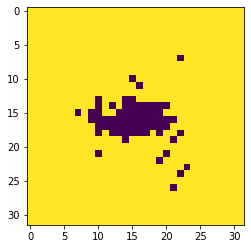

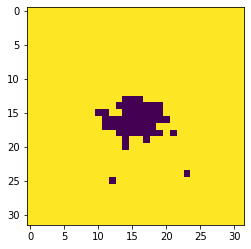

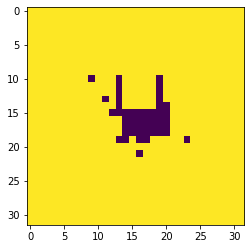

In [20]:
plt.imshow(data1[0][:,:,0]==0)
plt.show()
plt.imshow(data2[1][:,:,0]==0)
plt.show()
plt.imshow(data1[1][:,:,1]==0)

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [22]:
train_x = torch.tensor(data1(), dtype=torch.float32)
train_y = torch.tensor(labels1(), dtype=torch.float32)
test_x = torch.tensor(data2(), dtype=torch.float32)
test_y = torch.tensor(labels2.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(train_x, train_y)
val_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=len(val_dataset))

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'